<a href="https://api.tidesandcurrents.noaa.gov/api/prod/"><img src="img/l_noaa.svg" style="width:70px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">Weather Analysis</h1>

## Stations  
  
[Clearwater Beach, FL CWBF1 8726724](https://www.ndbc.noaa.gov/station_page.php?station=cwbf1)  
[Lewes, DE 8557380](https://tidesandcurrents.noaa.gov/stationhome.html?id=8557380)  
[Ocean City Inlet, MD OCIM2 8570283](https://www.ndbc.noaa.gov/station_history.php?station=ocim2)

In [9]:
import io
import sys
import numpy as np
import pandas as pd
import geopandas as gpd                                 # !{sys.executable} -m pip install geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]                # [width, height] (inches)
plt.rcParams['figure.dpi'] = 300                        # 200 e.g. is really fine, but slower
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import OrderedDict
import xlrd                                             #!{sys.executable} -m pip install xlrd
import IPython
import pytz
import datetime
from datetime import datetime
import requests

def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5 / 9
    return celsius

def celsius_to_fahrenheit(celsius):
    fahrenheit = (celsius * 9 / 5) + 32
    return fahrenheit

In [3]:
station = 'ClearwaterBeach2019'
url = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=cwbf1h2019.txt.gz&dir=data/historical/stdmet/'

In [6]:
station = 'OceanCity2019'
url = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=ocim2h2019.txt.gz&dir=data/historical/stdmet/'

In [7]:
df = pd.read_csv(url, sep='\s+', skiprows=[1], header=0)
# df.columns
df = df.drop(columns=['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'DEWP', 'VIS', 'TIDE'])
df = df.rename(columns={"#YY": "year", "MM": "month", "DD": "day", "hh": "hour", "mm": "minute", "ATMP": "airc", "WTMP": "watc"}, errors="raise")
#cols = ['YY', 'MM', 'DD', 'hh', 'mm']
#df[cols] = df[cols].applymap(np.int64)
df['dateInt'] = df['year'].astype(str) + df['month'].astype(str).str.zfill(2) + df['day'].astype(str).str.zfill(2) + df['hour'].astype(str).str.zfill(2) + df['minute'].astype(str).str.zfill(2)
df['TimeStamp'] = pd.to_datetime(df['dateInt'], format='%Y%m%d%H%M')
df = df.replace(999.0, np.nan)
df = df.set_index("TimeStamp")
df["airf"] = celsius_to_fahrenheit(df["airc"])
df["watf"] = celsius_to_fahrenheit(df["watc"])
df = df.drop(columns=['year', 'month', 'day', 'year', 'hour', 'minute', 'dateInt', 'airc', 'watc'])
df.dtypes
print(df.head())

airf   watf
TimeStamp                        
2019-01-01 00:00:00  49.82  46.04
2019-01-01 00:06:00  49.64  46.04
2019-01-01 00:12:00    NaN    NaN
2019-01-01 00:18:00    NaN    NaN
2019-01-01 00:24:00  50.00  46.04


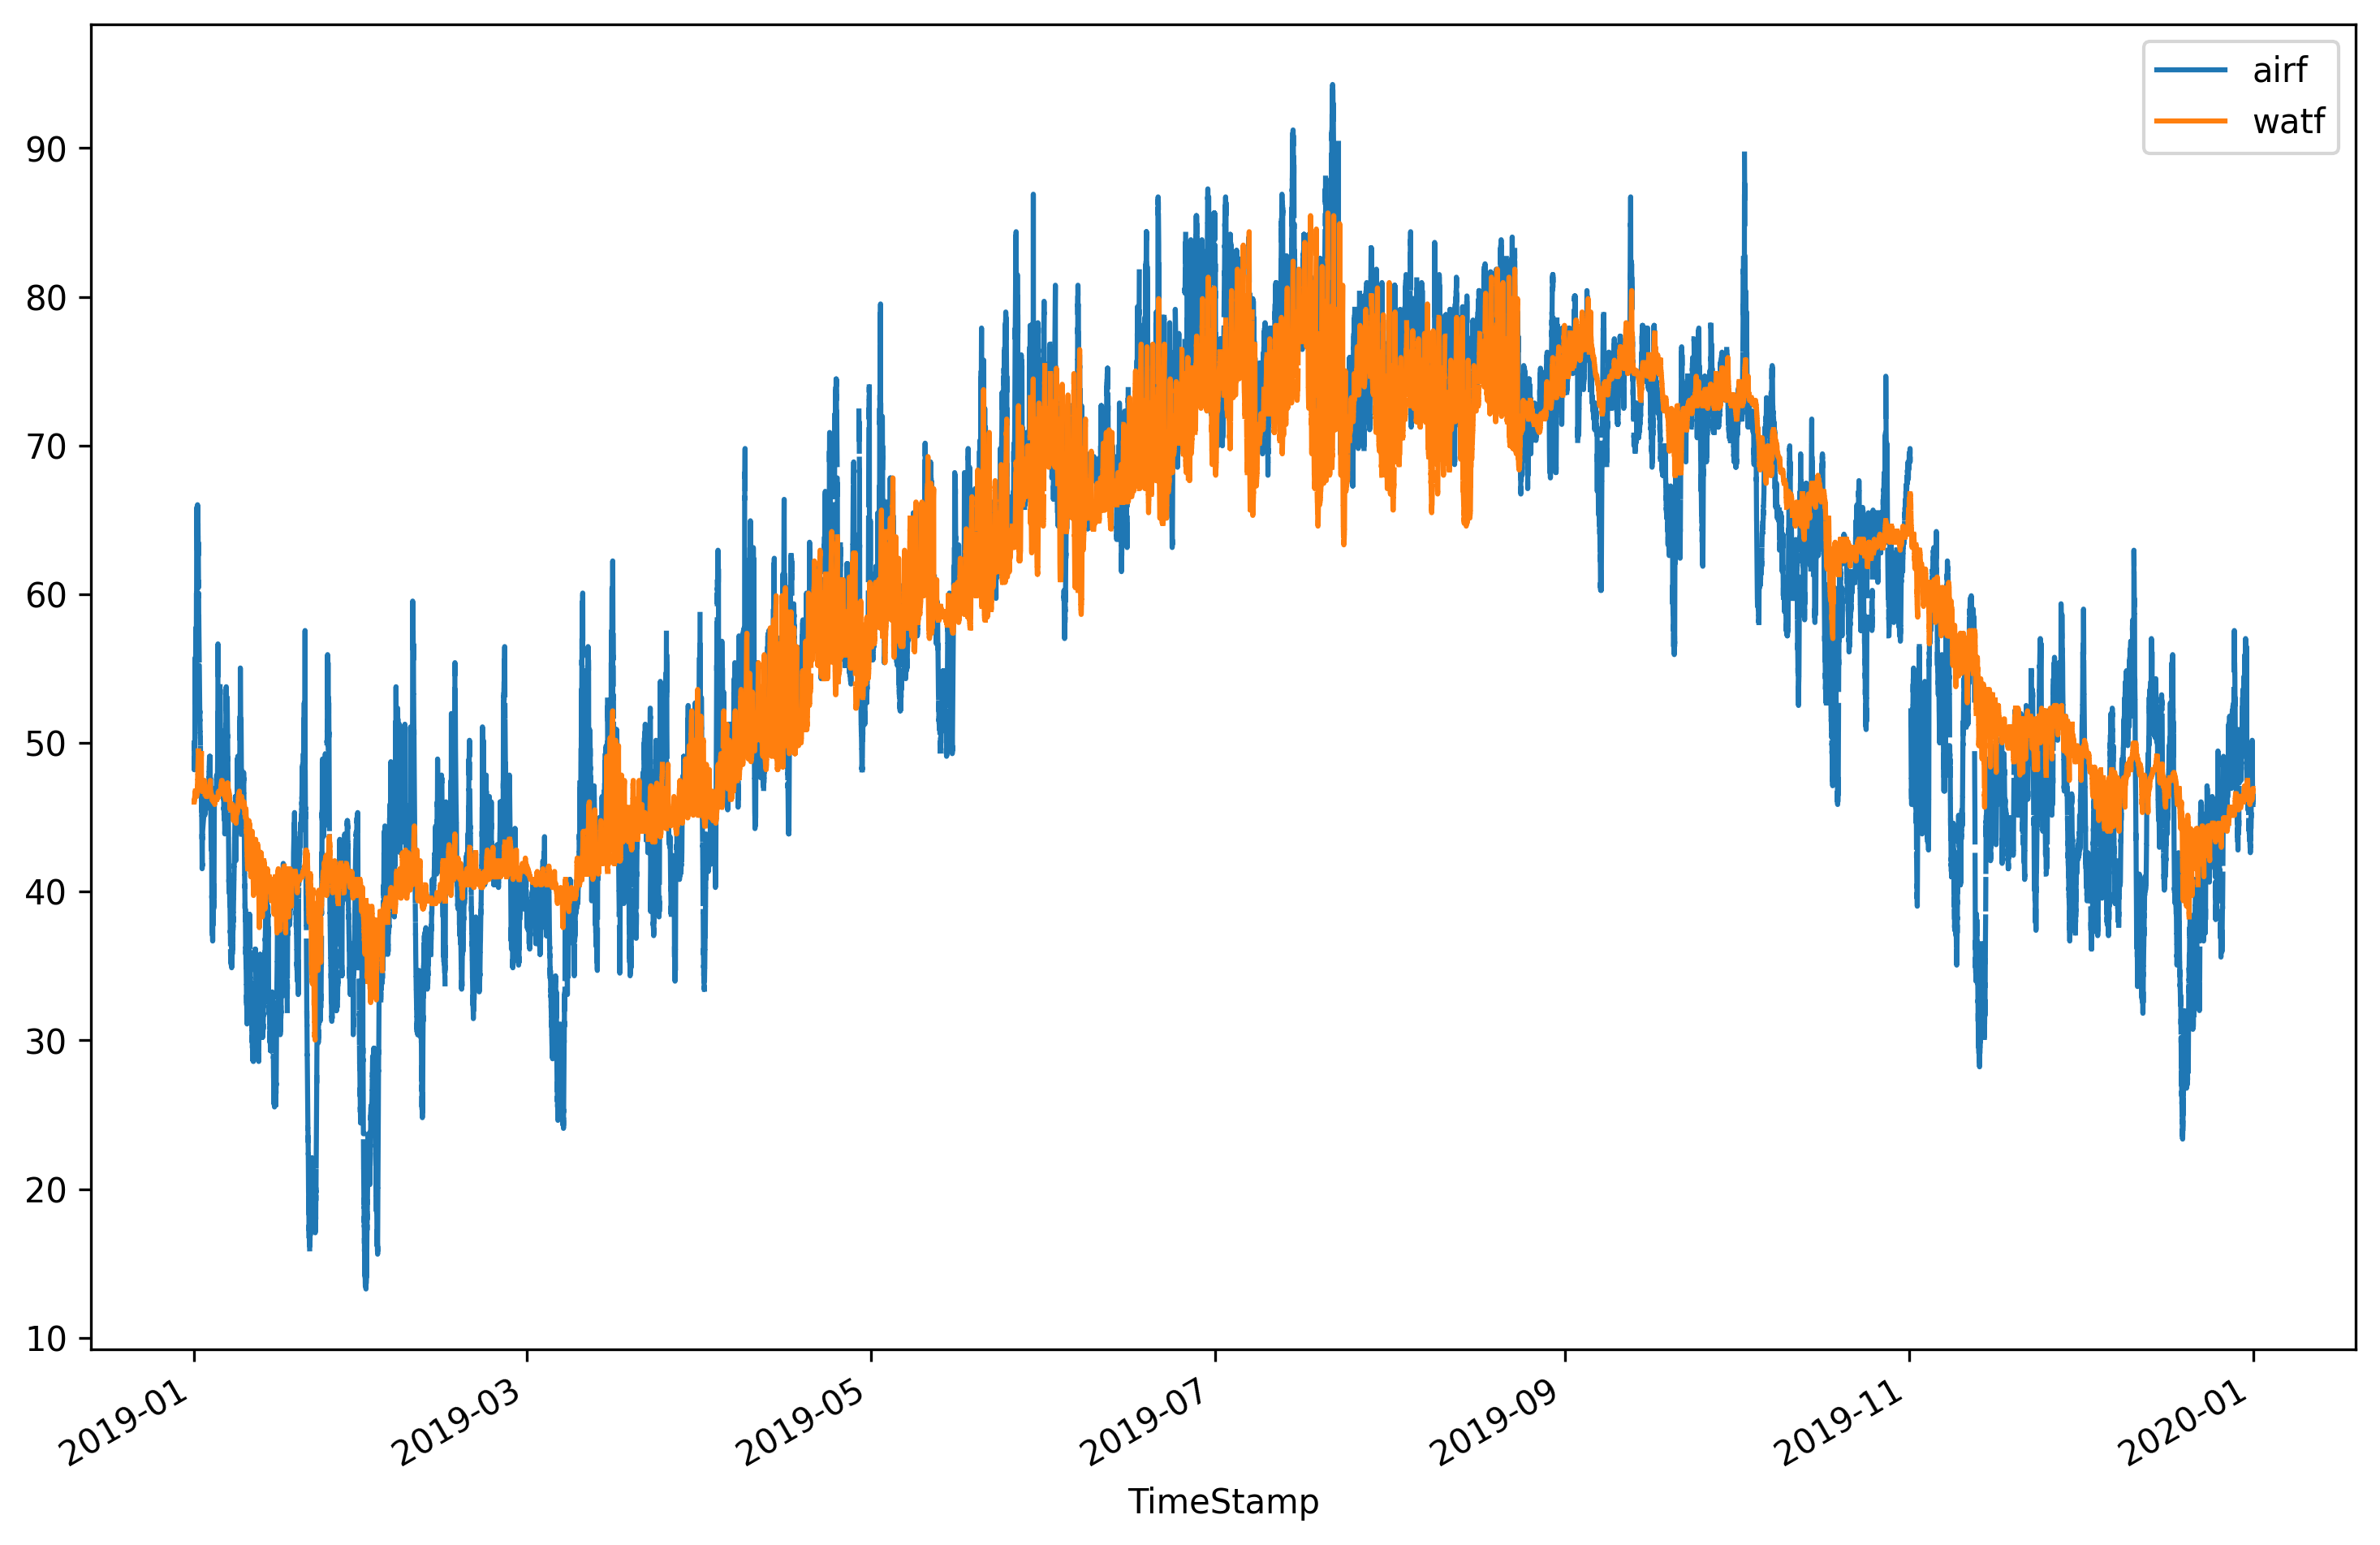

In [8]:
filename = station + '.png'
ax = df.plot()
plt.savefig(filename, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [7]:
url = 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter'
begin     = '20180101'
end       = '20181231'
station   = '8726724'             # https://tidesandcurrents.noaa.gov/stations.html
product   = 'air_temperature'     # air_temperature, water_temperature, wind, air_pressure, visibility, humidity
units     = 'english'             # Metric, english
timezone  = 'lst_ldt'             # gmt, lst, lst_ldt
interval  = 'h'                   
output    = 'csv'                 # JSON, CSV, XML

query = '?begin_date=' + begin + '&end_date=' + end + '&station=' + station + '&product=' + product + '&units=' + units + '&time_zone=' + timezone +'&interval=' + interval + '&application=web_services&format='+ output
                        
dfa = pd.read_csv(url + query, index_col='Date Time')
dfa = dfa.drop(columns=[' X', ' N', ' R '])
print(dfa.head())
print(dfa.tail())

Air Temperature
Date Time                         
2018-01-01 01:00               NaN
2018-01-01 02:00               NaN
2018-01-01 03:00               NaN
2018-01-01 04:00               NaN
2018-01-01 05:00               NaN
                   Air Temperature
Date Time                         
2018-12-31 19:00              74.5
2018-12-31 20:00              73.8
2018-12-31 21:00              72.5
2018-12-31 22:00              72.0
2018-12-31 23:00              70.9


<a href="https://pandas.pydata.org"><img src="img/l_pandas.png" style="width:70px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">DataFrame Methods</h1>

--------------------------------------  

```python
import pandas as pd                     
!{sys.executable} -m pip install pandas
```

### csv methods
```python
df = pd.read_csv('data/hosp.csv', index_col='Target?', dtype={'user_id': int})
with open('csvfile.csv', 'w') as csvfile: f = csv.writer(csvfile) f.writerows(items)   # write to csv file
```

### attributes
```python
pd.info()                               # data types and specs
pd.shape                                # dimensions (tuple)
pd.describe()                           # shows a quick statistic data summary
pd.dtypes                               # column labels & data types
pd.index                                # index (row labels)
pd.head(n)                              # return first n rows
pd.tail(n)                              # return last n rows    
pd.columns                              # column labels
pd.values                               # Numpy representation
pd.axes                                 # list axes
pd.size                                 # number (int) elements
pd.memory_usage([index, deep])          # each column memory (bytes)
```

### transforms
```python
pd.between_time(start_time, end_time)	# select range
pd.set_index()                          # set index using existing columns
pd.['col0'].astype(str)                 # change data type
df = pd.drop("del", axis=0)             # delete all rows with label "del"
df = pd.concat([df01, df02, df03])      # combine dataframes
pd.is_copy                              # return copy
pd.empty                                # empty
df = df.drop(columns=[' X', ' N'])      # drop columns
df = df.sort_values(by='column')        # sort
df = df.dropna()                        # drop rows w/ missing values
```

### [plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

```python
plt.figure(figsize=(16,9))
plt.rcParams["figure.figsize"] = [16,9]
df.plot.area([x, y])                    # stacked area plot
df.plot.bar([x, y])                     # vertical bar plot
df.plot.barh([x, y])                    # horizontal bar plot
df.plot.box([by])                       # box plot
df.boxplot([column, by, ax, …])         # box plot from columns
df.plot.hist([by, bins])                # histogram of columns
df.hist([column, by, grid, …])          # histogram
df.plot.line([x, y])                    # columns as lines
df.plot.pie([y])                        # pie plot
df.plot.scatter(x, y[, s, c])           # scatter plot
df.plot(legend=False)
df.plot(xlabel="new x", ylabel="new y")
ts.plot(logy=True)                      # log-scale
df['B'].plot(secondary_y=True, style='g') # secondary axis
df['A'].plot(x_compat=True)             # compa
df.plot.line()
with pd.plotting.plot_params.use('x_compat', True):
    df[' Air Temperature'].plot(color='b')
    df[' Water Temperature'].plot(color='g')
plt.rcParams["figure.figsize"] = [16,9]
dfa.plot.line()
dfw.plot.line()
```

### lookup()
Extract a set of values given a sequence of row labels and column labels return **NumPy array**

```python
DataFrame.lookup(list(range(0, 10, 2)), ['B', 'C', 'A', 'B', 'D'])
```

### query()

column b has values between column a and c values

```python
DataFrame.query('(a < b) & (b < c)')
index = pd.MultiIndex.from_arrays([colors, foods], names=['color', 'food'])
```

columns a and "b" have overlapping values
```python
DataFrame.query('a in b')
```

columns a and b have overlapping values and col c's values are less than col d's
```python
DataFrame.query('a in b and c < d')
```

Comparing a list of values to a column using ==/!= works similarly to in/not in.
```python
DataFrame.query('b == ["a", "b", "c"]')
```

select rows with index values 'Andrade' + 'Veness' with columns fr 'city' to 'email'  
```python
nDataFrame.loc[['Andrade', 'Veness'], 'city':'email']
```  
  
select same rows, with just 'first_name', 'address' and 'city' columns  
```python
DataFrame.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
```  
  
select rows with _first name_ Antonio and _columns_ 'city' to 'email'  
  
```python
DataFrame.loc[DataFrame['first_name'] == 'Antonio', 'city':'email']
```  
  
Select rows where email column ends w/ 'hotmail.com' include all columns  
```python
DataFrame.loc[DataFrame['email'].str.endswith("hotmail.com")]
```  

--------------------------------------

<a href="https://geopandas.org"><img src="img/l_geopandas.png" style="width:80px; float: left;"></a>    
<h1 style="padding-left:100px; border:none">GeoPandas Methods</h1>

--------------------------------------

```python
import geopandas as gpd                                 # !{sys.executable} -m pip install geopandas
geo_df = geopandas.read_file("data/maps/usgeojson/gz_2010_us_040_00_5m.json")
geo_df.head()
geo_df = gpd.read_file("data/maps/states_21basic/states.shp")
geo_df["STATE_FIPS"] = geo_df["STATE_FIPS"].astype(np.int64)
geo_df.head()
geo_df.dtypes
geo_df.plot()
df = pd.read_csv("data/uspop-nst-2018.csv", header=0)
df = df[['STATE_FIPS','POP_2018']]
merged = geo_df.join(df.set_index("STATE_FIPS"), on="STATE_FIPS")
merged.head()
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
merged.plot(column='POP_2018',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by State (m)",
                        'orientation': "horizontal"})
merged.plot(column='POP_2018');
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='POP_2018', ax=ax, legend=True, cax=cax)

fig.savefig("leaddistribution.png", dpi=300)
```
--------------------------------------

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html"><img src="img/l_excel.png" style="width:70px; float: left;"></a>    
<h1 style="padding-left:125px; border:none">Excel Methods</h1> 

--------------------------------------  
```python  
$ !pip install xlrd
import xlrd
xlsx = pd.ExcelFile('examples/ex1.xlsx')
df = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
df.to_excel('examples/ex2.xlsx')
df.to_excel(writer, 'Sheet1')
writer.save()
!rm examples/ex2.xlsx
```
--------------------------------------

# [MySQL Methods](https://www.mysql.com/products/connector/)  <img src="img/l_mysql.png" style="width:100px">

  
--------------------------------------  
```python
!pip install mysql-connector-python
import mysql.connector
config = {
    'host': 'rpsmithii.mysql.pythonanywhere-services.com',
    'database': 'rpsmithii$weight','user': 'rpsmithii',
    'password': 'Home@Call4','port': '3306'}
db = mysql.connector.connect(**config)
cur = db.cursor()
cur.execute("SELECT dt, wht FROM weight WHERE wht > 10")
table = pd.DataFrame(cur.fetchall())
table.columns = cur.column_names
```
--------------------------------------  

<h1 style="border:none">Zipcode Methods</h1>
  
----------------------------------
  
```python
from uszipcode import SearchEngine               # !{sys.executable} -m pip install uszipcode
search = SearchEngine(simple_zipcode=False)      # set simple_zipcode=False to use rich info database
#!pip3 install --upgrade uszipcode               # upgrade databases
search = SearchEngine(simple_zipcode=True)       # False uses rich info database
zipcode = search.by_zipcode("06916")
# zipcode.to_json()                              # to json
zipcode.to_dict()                                # to dict
# zip = zipcode.values()                         # to list
zipcode
```
----------------------------------
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}